<a href="https://colab.research.google.com/github/Nickguild1993/machine_learning_models/blob/main/SVM_TDS_walkthrough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### SVM implementation workshop

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

Towards Data Science Article- 
https://towardsdatascience.com/a-practical-introduction-to-support-vector-machines-from-scikit-learn-6e678cf1f228

In [2]:
url = "https://raw.githubusercontent.com/UCL-DSS/svm-workshop/master/RedBlue.csv"

In [3]:
df = pd.read_csv(url)
df.head(5)

,x,y,Colour
0,10.4,8.8,blue
1,4.6,5.8,red
2,11.2,9.0,blue
3,9.8,11.4,blue
4,11.0,11.8,blue


In [4]:
# fix that british "colour"

df = df.rename(columns={"Colour": "color"})

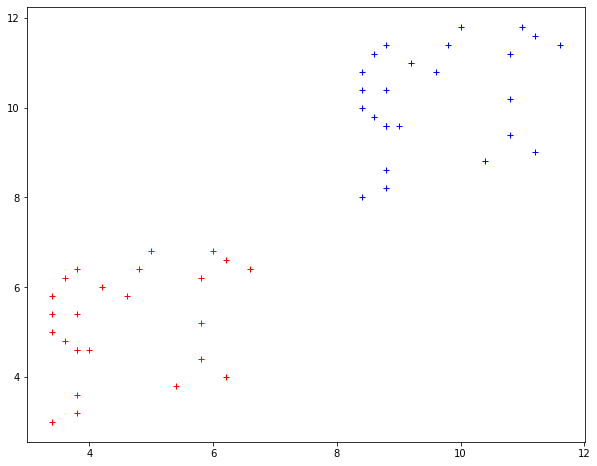

In [5]:
# split rows based on color in color column

red = df.loc[df["color"] == "red"]
blue = df.loc[df["color"]=="blue"]

# plot the red and blue data
plt.figure(figsize=(10,8))
plt.plot(red["x"], red["y"], "r+")
plt.plot(blue["x"], blue["y"], "b+")

In [6]:
# importing train_test_split to see how model behaves/performs on unseen data that we know outcome for

from sklearn.model_selection import train_test_split

# independent variables
X = df.drop("color", axis=1)

# dependent variable
y = df["color"]

In [7]:
# Allocates 80% of data for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2)

In [9]:
# import svm
from sklearn import svm

# Chooses the SVM algorithm for our classifier
svc = svm.SVC(kernel="linear")

# training the classifier
svc_trained = svc.fit(X_train, y_train)

# scoring the classifier 
svc_trained.score(X_train, y_train)

# output is 1.0, meaning that we have perfect training set accuracy

1.0

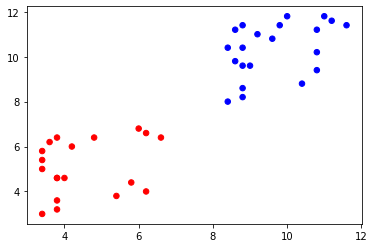

In [11]:
# Eval of SVC

plt.scatter(X_train["x"],
            X_train["y"],
            c= y_train,
            s=30,
            cmap = plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


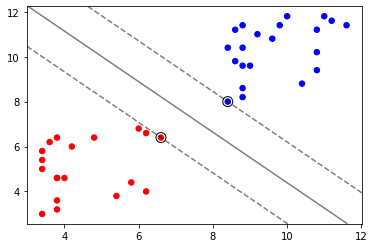

In [14]:
plt.scatter(X_train["x"],
            X_train["y"],
            c= y_train,
            s=30,
            cmap = plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to eval model

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svc.decision_function(xy).reshape(XX.shape)

# plot decsion boundary and margins

ax.contour(
    XX, YY, Z, colors = "k", levels = [-1,0,1], alpha=0.5, linestyles = ["--", "-", "--"]
)

# plot the support vectors
ax.scatter(
    svc.support_vectors_[:,0],
    svc.support_vectors_[:,1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k"
)

plt.show()